## Using Fiona to manipuate shapefiles and do spatial analysis
Fiona is an excellant tool for spatial manipulation. This session show you how to use fiona to read and write shapefiles. Shapely and Fiona. These libraries are essentially wrappers for GEOS and OGR, respectively, which provide clean, Pythonic interfaces for performing the processing, while still keeping the performance capabilities of the underlying libraries.

Fiona is used for reading and writing vector files (here we’re using Shapefiles), while Shapely is used for doing the manipulation and analysis of the geometric objects.

This session will include some major sections, 

1. Read metadata, attributes, geometry of features in shapfile using fiona

1. Create shapefile based on the longitude and latitude 

1. Convert the projection of shapefiles using pyproj

1. Do buffer analysis using fiona+shapely

1. Do intersection of point feature class and polygon feature class

References:

Pandas Tutorial, https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python

Fiona Manual, http://toblerity.org/fiona/manual.html

Shapely Manual, http://toblerity.org/shapely/manual.html


AZAVEA Research Blog, Using Shapely and Fiona to Locate High-Risk Traffic Areas, https://www.azavea.com/blog/2016/10/05/philippines-road-safety-using-shapely-fiona-locate-high-risk-traffic-areas/


#### 1. Read the metadata of shapefiles using fiona

In [26]:
# get the meta data of shapefile, such as spatial reference, field names, etc
import fiona
from fiona.crs import to_string
from shapely.geometry import shape

neighborhood_shp = '../data/census-tract-data.shp'

with fiona.open(neighborhood_shp, 'r') as nb_lyr:
    driver = nb_lyr.driver # the driver of the shapefile
    schema = nb_lyr.schema  #schema of shapefile
    crs = nb_lyr.crs   # coordinate reference system of the shapefile
    meta = nb_lyr.meta # more details about the metadata of the shapefile


Let's take a look at what those metadata look like

In [27]:
print ('The driver is:', driver)
print ('The schema is:', schema)
print ('The crs is:', crs)
print ('the metadata is:', meta)

The driver is: ESRI Shapefile
The schema is: {'properties': OrderedDict([('STATEFP', 'str:80'), ('COUNTYFP', 'str:80'), ('TRACTCE', 'str:80'), ('GEOID', 'str:80'), ('NAME_x', 'str:80'), ('NAMELSAD', 'str:80'), ('MTFCC', 'str:80'), ('FUNCSTAT', 'str:80'), ('ALAND', 'int:18'), ('AWATER', 'int:18'), ('INTPTLAT', 'str:80'), ('INTPTLON', 'str:80'), ('NAME_y', 'str:80'), ('GEO_ID', 'str:80'), ('white_popu', 'str:80'), ('non-hispan', 'str:80'), ('black_popu', 'str:80'), ('asian_popu', 'str:80'), ('hispanic_p', 'str:80'), ('total_popu', 'str:80'), ('median_hou', 'str:80'), ('per_capita', 'str:80'), ('built_age', 'str:80'), ('less_highs', 'str:80'), ('bachelor', 'str:80'), ('totaleduca', 'str:80'), ('male_und18', 'str:80'), ('female_und', 'str:80'), ('male65_66', 'str:80'), ('male67_69', 'str:80'), ('male70_74', 'str:80'), ('male75_79', 'str:80'), ('male80_84', 'str:80'), ('male85_', 'str:80'), ('fema_65_66', 'str:80'), ('fema_67_69', 'str:80'), ('fema70_74', 'str:80'), ('fema75_79', 'str:80'),

Let's print the geometry and attribute of the features in shapefile

In [15]:
with fiona.open(neighborhood_shp, 'r') as nb_lyr:
    for feat in nb_lyr:
        # attribute of the neighborhood features
        attr = feat['properties']
        name = attr['TRACTCE']  #you can find other attribute based on the metadata of the shapefile
        print ('The neighborhod is:', name)
        
        # get the geometry of the polygon feature
        geom = feat['geometry']
#         print ('geom is:', geom)
        

The neighborhod is: 014500
The neighborhod is: 031200
The neighborhod is: 021800
The neighborhod is: 009100
The neighborhod is: 033600
The neighborhod is: 004202
The neighborhod is: 016800
The neighborhod is: 007000
The neighborhod is: 029100
The neighborhod is: 980100
The neighborhod is: 021300
The neighborhod is: 030000
The neighborhod is: 013300
The neighborhod is: 012204
The neighborhod is: 012203
The neighborhod is: 013602
The neighborhod is: 034502
The neighborhod is: 000902
The neighborhod is: 000804
The neighborhod is: 001202
The neighborhod is: 001201
The neighborhod is: 002702
The neighborhod is: 026301
The neighborhod is: 029200
The neighborhod is: 024400
The neighborhod is: 033200
The neighborhod is: 980200
The neighborhod is: 000100
The neighborhod is: 000200
The neighborhod is: 000300
The neighborhod is: 036700
The neighborhod is: 037800
The neighborhod is: 037600
The neighborhod is: 001001
The neighborhod is: 000402
The neighborhod is: 036900
The neighborhod is: 037300
T

We can convert the dictionary `geom` variable into a shapely Polygon object using shapely. Here is one example of using shapely to deal with the geometry of features in shapefile. We will talk more about this in the following part. 

#### 2. Create shapefile based on the longitude and latitude information in the csvfile.

Using pandas to read the csv file and create shapefile based on the longitude and latitude. Pandas is just like MS Excel, it makes dealing with spreadsheet super easy. Let get started! 

Reference:

https://www.tutorialspoint.com/python_pandas/index.htm

https://pandas.pydata.org/pandas-docs/stable/tutorials.html

Read the csv file using pandas

In [17]:
import pandas as pd

# read the csv file and create shapefile
coffee_shop_csv = '../data/cambridge_coffee_shops.csv'
coffee_shop_sheet = pd.read_csv(coffee_shop_csv)
# coffee_shop_sheet

Print the first 10 records of the dataframe, this will help you know the structure of the dataframe

In [18]:
# this will print the first 10 records of the data frame
coffee_shop_sheet.head()

,id,name,address,city,state,zip,lat,lon
0,1,1369 Coffee House,1369 Cambridge St,Cambridge,MA,2139,42.373695,-71.100440
1,2,1369 Coffee House,757 Massachusetts Ave,Cambridge,MA,2139,42.366432,-71.105430
2,3,Aceituna Cafe,605 W Kendall St,Cambridge,MA,2142,42.364370,-71.081924
3,4,Al's Deli Cafe-Cambridge,1354 Massachusetts Ave,Cambridge,MA,2138,42.373238,-71.118340
4,5,Algiers Coffee House,40 Brattle St # 3,Cambridge,MA,2138,42.373840,-71.121380


create a shapefile using `Fiona` based on the coordinate and attributes information in the csv file


In [19]:
from shapely.geometry import Point, mapping

# prepare the schema and crs of the output shapefile
schema = {
    'geometry': 'Point',
    'properties': {
        'id': 'str: 20',
        'name': 'str: 20',
        'address': 'str: 20',
        'city': 'str: 20',
        'state':'str: 20',
        'zip': 'str: 7'
    }
}

crs = {'init': u'epsg:4326'}

# The output shapefile
coffee_shop_shp = 'cambridge_coffee_shops2.shp' 

with fiona.open(coffee_shop_shp, 'w', driver = "ESRI Shapefile", crs = crs, schema=schema) as output:
    for row in coffee_shop_sheet.iterrows():
        lon = row[1][7]
        lat = row[1][6]
        
        id_ = row[1][0]
        name = row[1][1]
        address = row[1][2]
        city = row[1][3]
        state = row[1][4]
        zipcode = row[1][5]
        
        point = Point(float(lon), float(lat))
        output.write({'properties':{'id': id_,
                                    'name': name,
                                    'address': address,
                                    'city': city,
                                    'state': state,
                                    'zip': zipcode
                                    },
                      'geometry': mapping(point)
                     })

print ('You have export the shapefile successfully')


You have export the shapefile successfully


#### 3. Convert the shapefile in a local projection of Massachusetts, unit is feet
The epsg code of Massachusetts is 2249. For more information about the projection and the epsg code can be find here, http://spatialreference.org/ref/epsg/?search=massachusetts&srtext=Search

In [20]:
from functools import partial
import pyproj
from shapely.ops import transform


# the crs of Massachusetts mainland
mass_crs = {'init': u'epsg:2249'}

# the output reprojected coffee shop shapefile
coffee_shop_shp_reproj = '../data/cambridge_coffee_shops2_massproj.shp'    

# write the reprojected point feature to shapefile
with fiona.open(coffee_shop_shp) as source, fiona.open(coffee_shop_shp_reproj, 'w', driver=source.driver, crs=mass_crs,schema=source.schema) as dest:
    for feat in source:
        pnt_geom = shape(feat['geometry'])
        data = feat['properties']
        
        # Transform the coordinates of every ring.
        project = partial(pyproj.transform, pyproj.Proj('EPSG:4326'), pyproj.Proj('EPSG:2249')) #3857 is psudo WGS84 the unit is meter
        project = partial(pyproj.transform, pyproj.Proj('EPSG:4326'), pyproj.Proj('EPSG:2249')) #3857 is psudo WGS84 the unit is meter
        pnt_geom_reproj = transform(project, pnt_geom)
        
        dest.write({'geometry':mapping(pnt_geom_reproj),'properties': data})
        

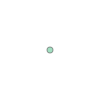

In [21]:
pnt_geom

Reproject a polygon shapefile file


In [22]:
# the crs of Massachusetts mainland
mass_crs = {'init': u'epsg:2249'}

neighborhood_shp_reproj = '../data/cambridge_neighborhood_massproj.shp'    

with fiona.open (neighborhood_shp, 'r') as source, fiona.open(neighborhood_shp_reproj, 'w', driver=source.driver, crs=mass_crs, schema=source.schema) as dest:
    for feat in source:
        data = feat['properties']
        polygon_geom = shape(feat['geometry'])
        
        project = partial(pyproj.transform, pyproj.Proj('EPSG:4326'), pyproj.Proj('EPSG:2249')) #3857 is psudo WGS84 the unit is meter
        polygon_geom_reproj = transform(project, polygon_geom)
        
        dest.write({'geometry': mapping(polygon_geom_reproj), 'properties': data })
        

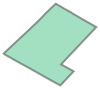

In [24]:
shape(feat['geometry'])

Let's see what the reprojected point feature look like

In [25]:
with fiona.open(coffee_shop_shp_reproj, 'r') as cof_lyr:
    print (cof_lyr.meta)
    
#     for feat in cof_lyr:
#         print feat['geometry']['coordinates']

{'driver': 'ESRI Shapefile', 'schema': {'properties': OrderedDict([('id', 'str:20'), ('name', 'str:28'), ('address', 'str:27'), ('city', 'str:20'), ('state', 'str:20'), ('zip', 'str:7')]), 'geometry': 'Point'}, 'crs': {'init': 'epsg:2249'}, 'crs_wkt': 'PROJCS["NAD83 / Massachusetts Mainland (ftUS)",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",41],PARAMETER["central_meridian",-71.5],PARAMETER["standard_parallel_1",42.6833333333333],PARAMETER["standard_parallel_2",41.7166666666667],PARAMETER["false_easting",656166.667],PARAMETER["false_northing",2460625],UNIT["US survey foot",0.304800609601219,AUTHORITY["EPSG","9003"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","2249"]]'}


### 4. Do buffer analysis using fiona+shapely
Buffer analysis, save the buffer feature as new shapefile

In [12]:

schema = {
    'geometry': 'Polygon',
    'properties': {
        'id': 'str: 20',
        'name': 'str: 20',
        'address': 'str: 20',
        'city': 'str: 20',
        'state':'str: 20',
        'zip': 'str: 7'
    }
}


buffer_coffee_200ft = '../data/cambridge_coffee_shops_200ftBuff.shp' 

with fiona.open(coffee_shop_shp_reproj) as source, fiona.open(buffer_coffee_200ft, 'w', driver=source.driver, crs=source.crs, schema=schema) as dest:
    for feat in source:
        buff_geom = shape(feat['geometry']).buffer(200)
        data = feat['properties']
        
        dest.write({'geometry':mapping(buff_geom), 'properties': data})
        

### Intersect the point on the polygon using Rtree

In [ ]:
# building rtree on land use map
with fiona.open(landuse, 'r') as lu_lyr:
    index = rtree.index.Index()
    
    # populate the spatial index, the polygon features
    for fid, feature in lu_lyr.items():
        if fid % 10000 == 0: print (fid)
        try:
            geom_lu = shape(feature['geometry'])
            # fill the rtree
            index.insert(fid, geom_lu.bounds)
        except:
            continue
    print('You have create the rtree successfully')
    
    
    # loop all building footprint polygons and find the overlap/intersect/fallin land use polygon
    with fiona.open(building, 'r') as build_lyr:
        for idx, featBuild in enumerate(build_lyr):
            if idx %10000 ==0: print('Building footprint:', idx)
            
            build_id = featBuild['properties']['OBJECTID']
            geomBuild = shape(featBuild['geometry'])
            centroid_bd = geomBuild.centroid
            
            # deal with multipolygon and single polygon of building blocks
            if featBuild['geometry']['type'] != 'MultiPolygon': # for single polygon of building block             
                # find all the intersected land use polygon of the building footprint polygon
                fids = [int(i) for i in index.intersection(geomBuild.bounds)]
                print(len(fids))
                # loop all features in the candidate land use polygons and then judge if the land use polygon contain the centroid of buiding footprint
                for fid in fids:
                    featLu = lu_lyr[fid]
                    geomLu = shape(featLu['geometry'])
                    lu_desc = featLu['properties']['C_DIG2DESC']
#                     print(lu_desc)
                    
                    # if the building polygon is intersected with the land use polygon and the centroid falls in the land use polygon
                    if geomLu.intersects(geomBuild) and geomLu.contains(centroid_bd) :
                        bd_lu_desc = lu_desc
                        print('The land use type for the building is:', build_id, bd_lu_desc)
                        

In [ ]:

def AggregatePnt2Polygon(pntshp, polygonshp, outPolygonShp):

    '''
    This function is used aggregate the point level feature to polygons
    Last modified Dec 26, 2019 by Xiaojiang Li, Temple University

    Example:
        root = r'/Users/senseablecity/Dropbox (MIT)/ResearchProj/Treepedia/NYC-MillionsTree/spatial-data'
        pntshp = os.path.join(root, 'NYC_2008_2014_GSV.shp')
        polygonshp = os.path.join(root, 'nyc_censustract.shp')
        outPolygonShp = os.path.join(root, 'nyc_gvi_censustract.shp')

        AggregatePnt2Polygon(pntshp, polygonshp, outPolygonShp)
    
    '''
    
    import rtree
    import fiona
    import os, os.path
    from statistics import median
    from shapely.geometry import shape
    from shapely.ops import transform
    from functools import partial
    import pyproj
    
    
    with fiona.open(pntshp, 'r') as pnt_lyr:     
        # create an empty spatial index object
        index = rtree.index.Index()
        
        # populate the spatial index, the polygon features
        i = 0
        for fid, feature in pnt_lyr.items():
            i = i + 1
            if i % 10000 == 0: print (i)
            geometry = shape(feature['geometry'])
            
            # convert the projection to psudo wgs projection with unit of meter
            # project = partial(pyproj.transform,pyproj.Proj(init='EPSG:4326'),pyproj.Proj(init='EPSG:3857')) #3857 is psudo WGS84 the unit is meter
            project = partial(pyproj.transform,pyproj.Proj('EPSG:4326'),pyproj.Proj('EPSG:3857')) #3857 is psudo WGS84 the unit is meter
            geometry_m = transform(project, geometry)
            
            # add a buffer in order to create a r-tree
            geometry_buffered = geometry_m.buffer(10) 
            geotype = feature['geometry']['type']
            
            index.insert(fid, geometry_buffered.bounds)
        
        # loop all polygons and assign GVI values
        with fiona.open(polygonshp, 'r') as polygon_lyr:
            schema = polygon_lyr.schema.copy()
            schema['properties']['gvi']='float' 
            input_crs = polygon_lyr.crs
            
            # write the intersected point into the new shapefile
            with fiona.open(outPolygonShp, 'w', 'ESRI Shapefile', schema, input_crs) as output:
                
                # loop the polygon feature
                for idx, featPoly in enumerate(polygon_lyr):
                    print('Polygon:', idx)
                    geomPoly = shape(featPoly['geometry'])
                    project = partial(pyproj.transform,pyproj.Proj('EPSG:4326'),pyproj.Proj('EPSG:3857')) #3857 is psudo WGS84 the unit is meter
                    geomPoly_m = transform(project, geomPoly)
                    
                    attriPoly = featPoly['properties']

                    # using the bounding box to find the close but may not intersected point feature
                    fids = [int(i) for i in index.intersection(geomPoly_m.bounds)]

                    # the mean gvi value of all point in the polygon
                    gvi_list = []

                    # loop all features in bounding box and then judge if they are intersected
                    for fid in fids:
                        featPnt = pnt_lyr[fid]
                        geomPnt = shape(featPnt['geometry'])

                        # if the point is intersected with the polygon, then save the point feature into the output shapefile
                        if geomPoly.intersects(geomPnt):                            
                            gvi = featPnt['properties']['gvi']
                            gvi_list.append(gvi)

                    # the median value to the polygon
                    if len(gvi_list) < 3: 
                        print('No point')
                        attriPoly['gvi'] = -100
                    else:
                        # calculate the median value and assign it to the polygon
                        gvi_mean = median(gvi_list)
                        attriPoly['gvi']=gvi_mean


                    output.write({'geometry': mapping(geomPoly),'properties': attriPoly})
